<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BGroup7%5DFinetuning_with_CIFAR_10_dataset_and_Inference_for_random_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accuracy of the ConvNeXt-T model using CIFAR-10 dataset

In [1]:
# Installation and set-up
#!pip install -qq torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install -qq wandb timm==0.3.2 six tensorboardX

     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:48tcmalloc: large alloc 1147494400 bytes == 0x39d78000 @  0x7f8d5e292615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:12:14tcmalloc: large alloc 1434370048 bytes == 0x7e3ce000 @  0x7f8d5e292615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 1.3 MB/s eta 0:08:35tcmalloc: large alloc 1792966656 bytes == 0x3200000 @  0x7f8d5e292615 0x592b76 0x4df71e 0x59afff 0x515655 0x5

In [2]:
# Clone the official ConvNeXt respository
!git clone https://github.com/facebookresearch/ConvNeXt

Cloning into 'ConvNeXt'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 246 (delta 54), reused 40 (delta 40), pack-reused 162
Receiving objects: 100% (246/246), 71.61 KiB | 2.86 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [3]:
# Download the CIFAR-10 dataset
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 44.20 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Checking out files: 100% (60001/60001), done.


In [4]:
# Download the pretrained ConvNext-T model

%cd ConvNeXt/
!wget https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth

/content/ConvNeXt
--2022-05-22 10:53:09--  https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114414741 (109M) [binary/octet-stream]
Saving to: ‘convnext_tiny_1k_224_ema.pth’

convnext_tiny_1k_22 100%[===================>] 109.11M  47.9MB/s    in 2.3s    

2022-05-22 10:53:12 (47.9 MB/s) - ‘convnext_tiny_1k_224_ema.pth’ saved [114414741/114414741]



In [11]:
# Finetuning with CIFAR-10 dataset

!python main.py --epochs 10 \
                --model convnext_tiny \
                --data_set image_folder \
                --data_path ../CIFAR-10-images/train \
                --eval_data_path ../CIFAR-10-images/test \
                --nb_classes 10 \
                --num_workers 8 \
                --warmup_epochs 0 \
                --save_ckpt true \
                --output_dir model_ckpt \
                --finetune convnext_tiny_1k_224_ema.pth \
                --cutmix 0  --mixup 0  \
                --lr 4e-4 \


Not using distributed mode
Namespace(aa='rand-m9-mstd0.5-inc1', auto_resume=True, batch_size=64, clip_grad=None, color_jitter=0.4, crop_pct=None, cutmix=0.0, cutmix_minmax=None, data_path='../CIFAR-10-images/train', data_set='image_folder', device='cuda', disable_eval=False, dist_eval=True, dist_on_itp=False, dist_url='env://', distributed=False, drop_path=0, enable_wandb=False, epochs=10, eval=False, eval_data_path='../CIFAR-10-images/test', finetune='convnext_tiny_1k_224_ema.pth', head_init_scale=1.0, imagenet_default_mean_and_std=True, input_size=224, layer_decay=1.0, layer_scale_init_value=1e-06, local_rank=-1, log_dir=None, lr=0.0004, min_lr=1e-06, mixup=0.0, mixup_mode='batch', mixup_prob=1.0, mixup_switch_prob=0.5, model='convnext_tiny', model_ema=False, model_ema_decay=0.9999, model_ema_eval=False, model_ema_force_cpu=False, model_key='model|module', model_prefix='', momentum=0.9, nb_classes=10, num_workers=8, opt='adamw', opt_betas=None, opt_eps=1e-08, output_dir='model_ckpt',

In [ ]:
# The top 1 test accuracy is 92.12% and the top 5 test accuracy is 99.77%.
# This outcome is astounishing and shows that this model can be a great backbone of other downstream tasks. 

## Inference for random images




In [12]:
# Set up
import sys

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import json

import torch
import torchvision
import torchvision.transforms as T

if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.5.4 

from timm import create_model

Running in Colab.
     |████████████████████████████████| 431 kB 4.8 MB/s 
  Attempting uninstall: timm
    Found existing installation: timm 0.3.2
    Uninstalling timm-0.3.2:
      Successfully uninstalled timm-0.3.2


In [13]:
# pretrained model(ConvNext_XL)

model_name = "convnext_xlarge_in22k"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# ConvNeXt_XL model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/convnext.py
model = create_model(model_name, pretrained=True).to(device)

device =  cuda


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_xlarge_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_xlarge_22k_224.pth


In [14]:
# Define transforms for inference
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

NORMALIZE_MEAN = IMAGENET_DEFAULT_MEAN
NORMALIZE_STD = IMAGENET_DEFAULT_STD
SIZE = 256

# Resize smaller edge to 256, no center cropping
transforms = [
              T.Resize(SIZE, interpolation=T.InterpolationMode.BICUBIC),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [18]:
# Convert class label number to label(total 21,841 lables)
!wget https://dl.fbaipublicfiles.com/convnext/label_to_words.json
imagenet_labels = json.load(open('label_to_words.json'))

--2022-05-22 13:09:21--  https://dl.fbaipublicfiles.com/convnext/label_to_words.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773945 (756K) [application/json]
Saving to: ‘label_to_words.json’

label_to_words.json 100%[===================>] 755.81K  2.46MB/s    in 0.3s    

2022-05-22 13:09:21 (2.46 MB/s) - ‘label_to_words.json’ saved [773945/773945]



--2022-05-18 02:19:14--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyungRyunDang.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541300 (529K) [image/jpeg]
Saving to: ‘MyungRyunDang.jpeg.6’

MyungRyunDang.jpeg. 100%[===================>] 528.61K  --.-KB/s    in 0.04s   

2022-05-18 02:19:14 (14.3 MB/s) - ‘MyungRyunDang.jpeg.6’ saved [541300/541300]

ginkgo, gingko, maidenhair tree, Ginkgo biloba 73.69%
chinaberry, chinaberry tree, China tree, Persian lilac, pride-of-India, azederach, azedarach, Melia azederach, Melia azedarach 2.57%
caracolito, Ruptiliocarpon caracolito 1.03%
China tree, false dogwood, jaboncillo, chinaberry, Sapindus saponaria 0.71%
wild China tree, Sapindus drumondii, Sapindus marginatu

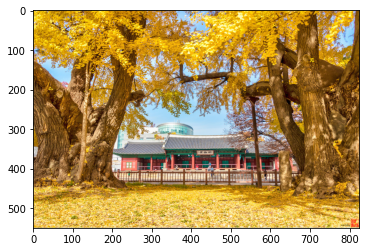

In [ ]:
# inference with a SKKU image

!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyungRyunDang.jpeg

img = PIL.Image.open('MyungRyunDang.jpeg.3')
img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)


output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)

--2022-05-22 13:09:28--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyunRyunDang2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215056 (2.1M) [image/jpeg]
Saving to: ‘MyunRyunDang2.jpg.3’

MyunRyunDang2.jpg.3 100%[===================>]   2.11M  --.-KB/s    in 0.06s   

2022-05-22 13:09:28 (33.1 MB/s) - ‘MyunRyunDang2.jpg.3’ saved [2215056/2215056]

memorial, monument 13.90%
pinetum 8.38%
repository, monument 5.88%
California box elder, Acer negundo Californicum 4.51%
statue 3.48%


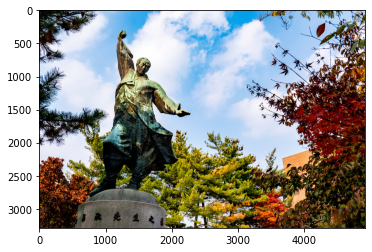

In [19]:
# inference with a image of the founder of SKKU



!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyunRyunDang2.jpg
img = PIL.Image.open('MyunRyunDang2.jpg.1')

img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)

output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)


--2022-05-18 02:20:12--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Library.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1160828 (1.1M) [image/jpeg]
Saving to: ‘Library.jpg.2’

Library.jpg.2       100%[===================>]   1.11M  --.-KB/s    in 0.05s   

2022-05-18 02:20:12 (23.8 MB/s) - ‘Library.jpg.2’ saved [1160828/1160828]

concrete 8.47%
university 5.38%
college 4.24%
building complex, complex 3.95%
medical building, health facility, healthcare facility 3.14%


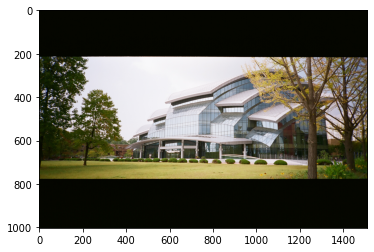

In [ ]:
# inference with a image of the library of SKKU

!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Library.jpg
img = PIL.Image.open('Library.jpg.1')

img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)

output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)


--2022-05-18 02:21:30--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Graduation.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499238 (2.4M) [image/jpeg]
Saving to: ‘Graduation.jpg.1’

Graduation.jpg.1    100%[===================>]   2.38M  --.-KB/s    in 0.06s   

2022-05-18 02:21:31 (38.2 MB/s) - ‘Graduation.jpg.1’ saved [2499238/2499238]

academic costume 83.72%
mortarboard 0.84%
academic gown, academic robe, judge's robe 0.61%
valedictorian, valedictory speaker 0.23%
schoolmate, classmate, schoolfellow, class fellow 0.18%


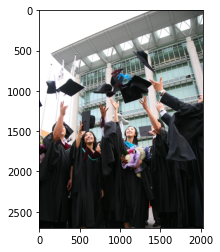

In [ ]:
# inference with a image of the library of SKKU

!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Graduation.jpg
img = PIL.Image.open('Graduation.jpg')

img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)

output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)